# Customer Churn Analysis:

Submitted by **POOJA C** Batch No:1831.

**STATEMENT: Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.** 

# Importing dataset:

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#To print all columns and all rows
pd.set_option('display.max_columns',None)

In [3]:
#importing dataset
df = pd.read_csv("CustomerChurn.csv") #Reading csv file
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In this perticular problem Churn is my target and this column is object type data with binary classification so this problem is **Classification problem.**

# Preprocessing and EDA:

In [4]:
#Checking shape of my dataset
df.shape

(7043, 21)

In this perticular dataset i have 7043 rows and 21 column.

In [5]:
#Checking all column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Above are the list of column names in the dataset.

In [6]:
#Checking the data types of all columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In my dataset i have object, float and int type datas.But TotalCharges is a float type data but it is showing object type let me change the data type.

In [7]:
#Converting TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [8]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Above is the info about the dataset there is no null values in the dataset.

In [9]:
#Checking unique values of each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Above are the unique value counts in each column.And in customer ID column all the values are unique it has nothing to do with my model training so let me drop this ID column.

In [10]:
#Droping customer ID column
df = df.drop(["customerID"],axis=1)

In [11]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

Male      3555
Female    3488
Name: gender, dtype: int64
****************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
****************************************
No     3641
Yes    3402
Name: Partner, dtype: int64
****************************************
No     4933
Yes    2110
Name: Dependents, dtype: int64
****************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
****************************************
Yes    6361
No      682
Name: PhoneService, dtype: int64
****************************************
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
****************************************
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
****************************************
No                     3498
Yes            

Above are the value counts of each column and i can see some duplicate entries in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i ahve to replace them.

I have replaced with No for No internet Service.If no internet service then there is no MultipleLines, OnlineSecurity,  OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So i will replace all these entries with 'No'. 

In [12]:
#Grouping entries of MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies column

#Grouping in MultipleLines column
df["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
df["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
df["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
df["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
df["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [13]:
#Checking null values in the dataset
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are null values in TotalCharges after changeing the data type.

In [14]:
#Replacing nan values of TotalCharges column with it's mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [15]:
#Checking nan values agian
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

All the nan values has replaced.

In [16]:
#Checking unique values of target column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

There are only two value counts in target column.

In [17]:
#Checking for empty observations
df.loc[df['Churn'] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


There is no empty observations in target column.

In [18]:
#Checking description of data set
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Above are the statistics about the numerical columns.describe by default takes only numerical columns.There is some difference between the mean and 2nd quantile value which means there are some outliers.

# Visualization:

# Univariate Analysis:

In [19]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Above are the list of categorical columns.

In [20]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Above are the list of numerical columns.

# Univariate analysis for numerical columns:

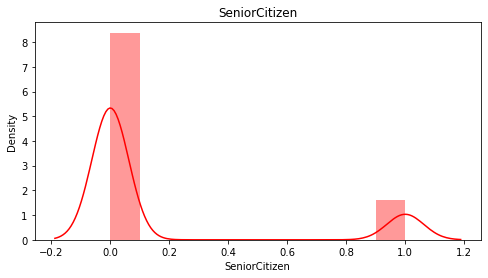

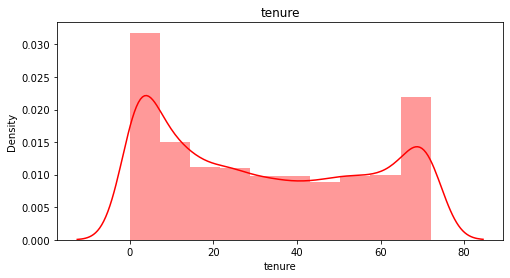

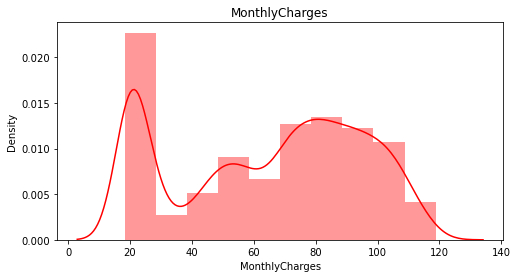

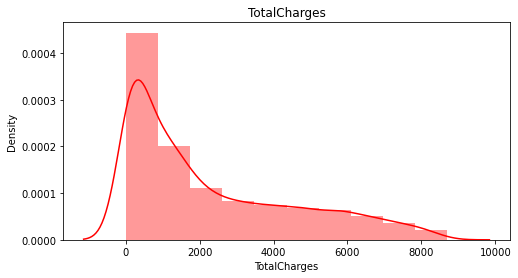

In [21]:
#Distribution plot for all numerical columns
for i in df[numerical_columns]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="r")
    plt.title(i)
    plt.show()

There is some skewness in all numerical columns.

# Univariate Analysis for categorical columns:

In [22]:
#Checking the value counts of gender column
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [23]:
#Checking the value counts of Partner column
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

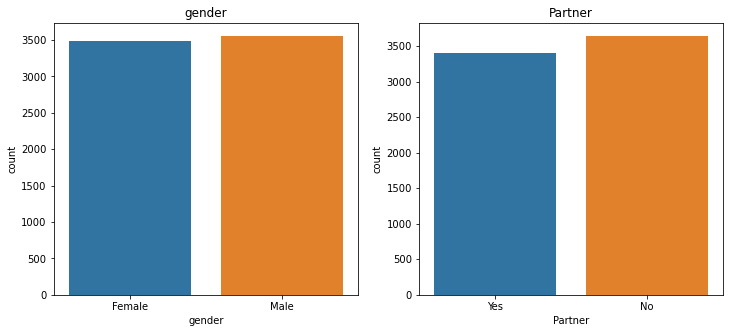

In [24]:
#Count plot for gender and Partner
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('gender')
sns.countplot(df['gender'])
plt.subplot(1, 2, 2)
plt.title('Partner')
sns.countplot(df['Partner'])
plt.show()

Both the genders has same count almost and having partner or not also has same count.

In [25]:
#Checking the value counts of Dependents column
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

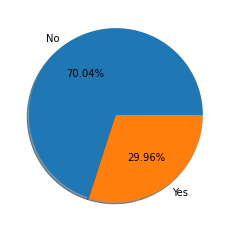

In [26]:
#Ploting pie chart for Dependents column
labels='No','Yes'
fig, ax = plt.subplots()
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In [27]:
#Checking the value counts of PhoneService column
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Most of the customers are with No Dependents.

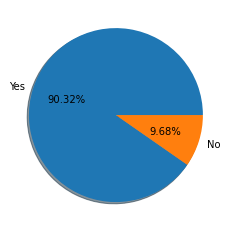

In [28]:
#Ploting pie chart for PhoneService column
labels='Yes','No'
fig, ax = plt.subplots()
ax.pie(df['PhoneService'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

It looks good to see that 90.32% customers are with PhoneService.

In [29]:
#Checking the value counts of MultipleLines column
df.MultipleLines.value_counts()

No     4072
Yes    2971
Name: MultipleLines, dtype: int64

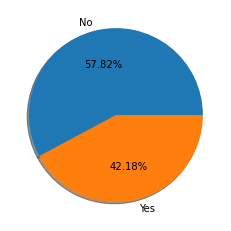

In [30]:
#Ploting pie chart for MultipleLines column
labels='No','Yes'
fig, ax = plt.subplots()
ax.pie(df['MultipleLines'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Maximum customers are without Multiplelines.

In [31]:
#Checking the value counts of InternetService column
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

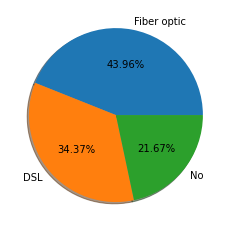

In [32]:
#Ploting pie chart for InternetService column
labels='Fiber optic','DSL','No'
fig, ax = plt.subplots()
ax.pie(df['InternetService'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the customers uses Fiber optic InternetService.And very less with no InternetService. 

In [33]:
#Checking the value counts of OnlineSecurity column
df.OnlineSecurity.value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [34]:
#Checking the value counts of OnlineBackup column
df.OnlineBackup.value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

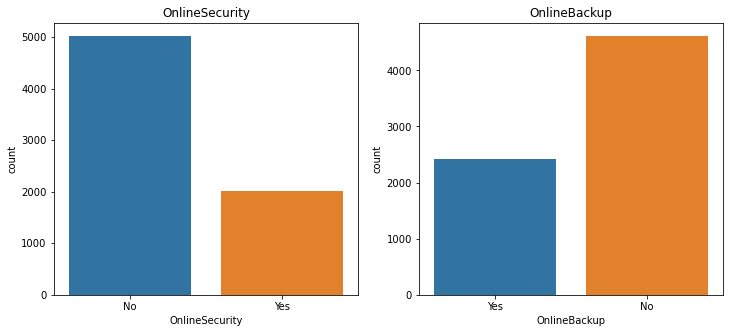

In [35]:
#Count plot for OnlineSecurity and OnlineBackup
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('OnlineSecurity')
sns.countplot(df['OnlineSecurity'])
plt.subplot(1, 2, 2)
plt.title('OnlineBackup')
sns.countplot(df['OnlineBackup'])
plt.show()

Most of the customers are without OnlineSecurity and without OnlineBAckup.

In [36]:
#Checking the value counts of DeviceProtection column
df.DeviceProtection.value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

In [37]:
#Checking the value counts of TechSupport column
df.TechSupport.value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

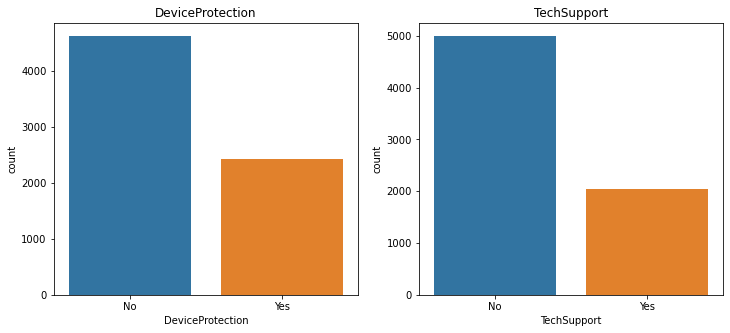

In [38]:
#Count plot for DeviceProtection and TechSupport
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('DeviceProtection')
sns.countplot(df['DeviceProtection'])
plt.subplot(1, 2, 2)
plt.title('TechSupport')
sns.countplot(df['TechSupport'])
plt.show()

Most of the coutomers are with No DeviceProtection and No TechSupport.

In [39]:
#Checking the value counts of StreamingTV column
df.StreamingTV.value_counts()

No     4336
Yes    2707
Name: StreamingTV, dtype: int64

In [40]:
#Checking the value counts of StreamingMovies column
df.StreamingMovies.value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

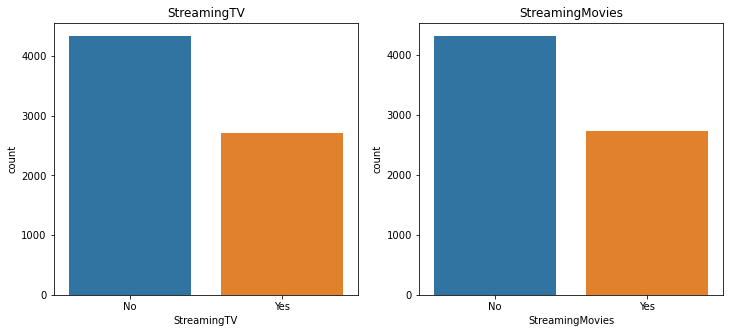

In [41]:
#Count plot for StreamingTV and StreamingMovies
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('StreamingTV')
sns.countplot(df['StreamingTV'])
plt.subplot(1, 2, 2)
plt.title('StreamingMovies')
sns.countplot(df['StreamingMovies'])
plt.show()

Most of the customers are with No StreamingTv and No StreamingMovies.

In [42]:
#Checking the value counts of Contract column
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

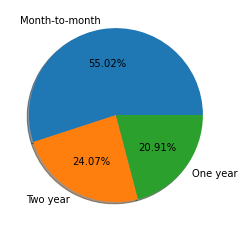

In [43]:
#Ploting pie chart for Contract column
labels='Month-to-month','Two year','One year'
fig, ax = plt.subplots()
ax.pie(df['Contract'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the customer prefer Month to month contract.

In [44]:
#Checking the value counts of PaperlessBilling column
df.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

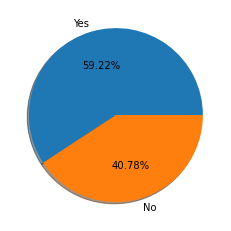

In [45]:
#Ploting pie chart for PaperlessBilling column
labels='Yes','No'
fig, ax = plt.subplots()
ax.pie(df['PaperlessBilling'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the customer prefer Paper.lessBilling.

In [46]:
#Checking the value counts of PaymentMethod column
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

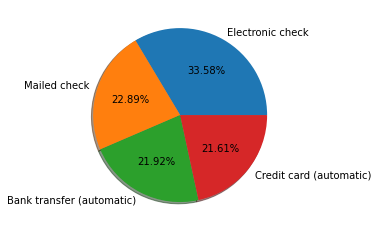

In [47]:
#Ploting pie chart for PaymentMethod column
labels='Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'
fig, ax = plt.subplots()
ax.pie(df['PaymentMethod'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Most of the customers uses Electronic check.And other 3 paymentmethods are also used simultaneously.

In [48]:
#Checking the value counts of Churn column
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

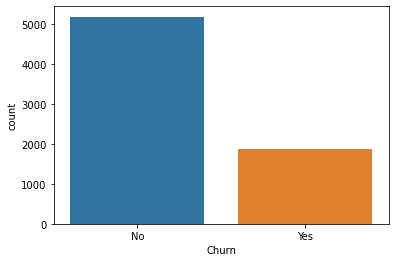

In [49]:
#Countplot for Churn column
sns.countplot(df['Churn'])

Most of the customers are without churn.And there is a data imbalancing issue in target column so i have to balance it.

# Bivariate Analysis:

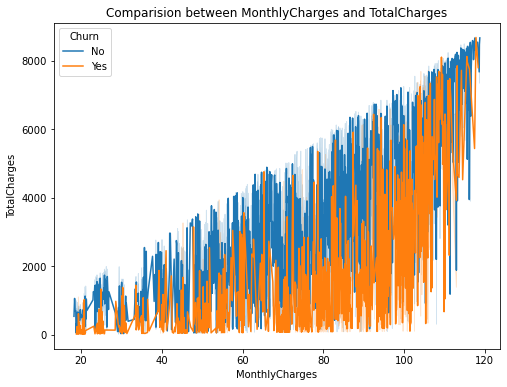

In [50]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between MonthlyCharges and TotalCharges')
sns.lineplot(df['MonthlyCharges'],df['TotalCharges'],hue=df['Churn']);

Yes for churn has maximum count near 50-100 MonthlyCharges.And i can see a linearly increasing curve.

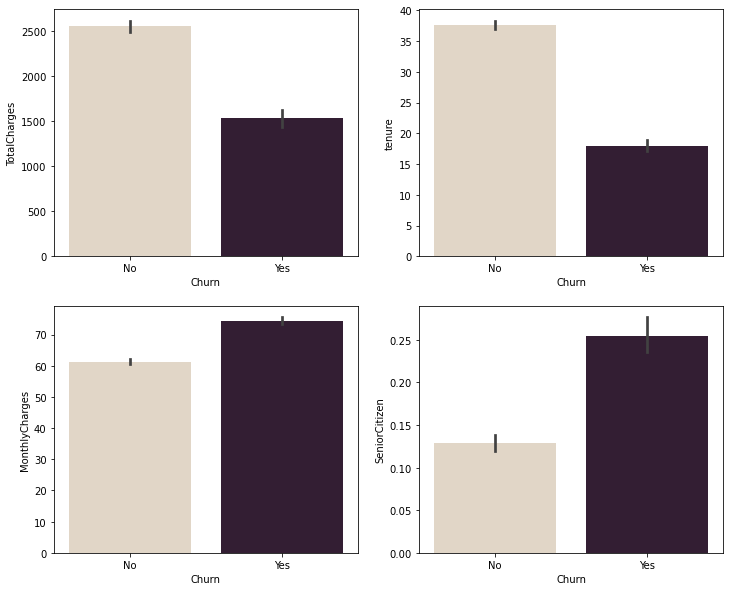

In [51]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn with TotalCharges
sns.barplot(x='Churn',y='TotalCharges',ax=axes[0,0],data=df,palette='ch:.25')

# Checking Churn with tenure
sns.barplot(x='Churn',y='tenure',ax=axes[0,1],data=df,palette='ch:.25')

# Checking Churn with MonthlyCharges
sns.barplot(x='Churn',y='MonthlyCharges',ax=axes[1,0],data=df,palette='ch:.25')

# Checking Churn with SeniorCitizen
sns.barplot(x='Churn',y='SeniorCitizen',ax=axes[1,1],data=df,palette='ch:.25')

plt.show()

By looking into the graph below are my observations
- If total charges is high then there is no churn.
- If tenure is high then there is no churn.
- If Monthly Charges are high then there is churn.
- If the person is senior citizen then there is churn.

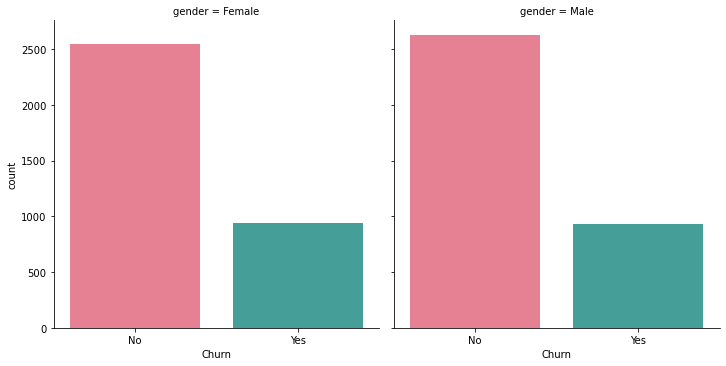

In [52]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='gender',data=df,kind='count',palette="husl")

For both sex the Churn is equal.

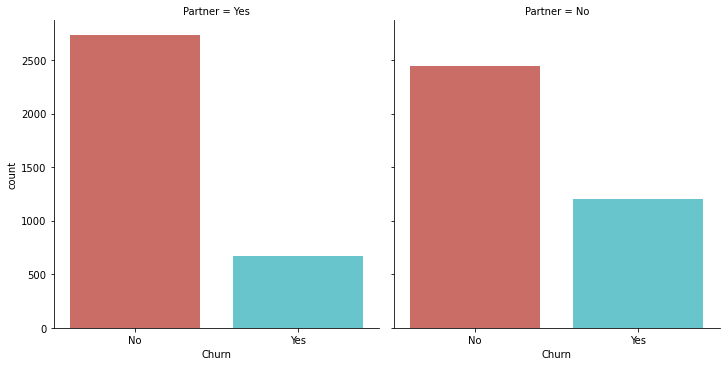

In [53]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Partner',data=df,kind='count',palette="hls")

Customers with partners are high in number.But Customers having partners are less churned than customers having partners.

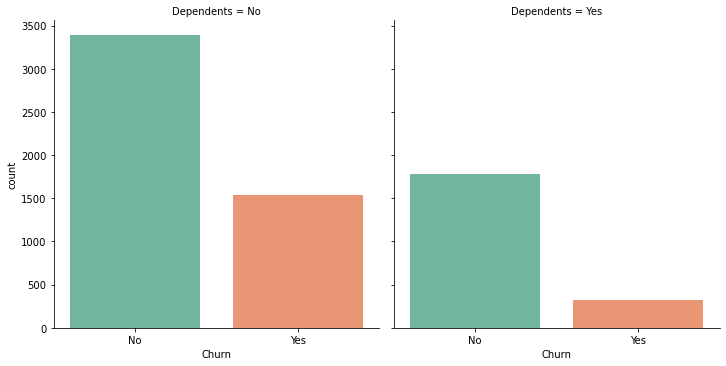

In [54]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Dependents',data=df,kind='count',palette="Set2")

Customers without dependents are more in number.But Customers having dependents are less churned than customers not having dependents.

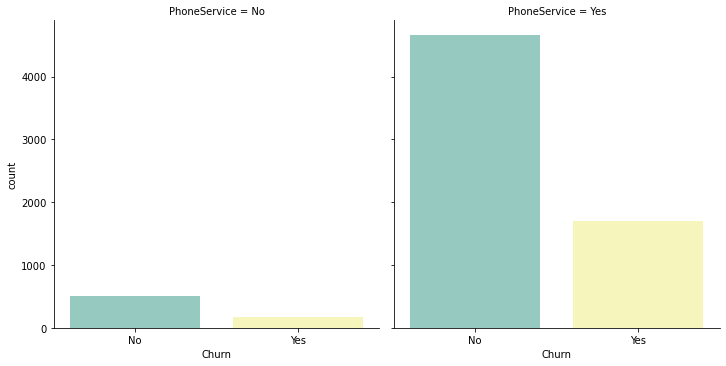

In [55]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='PhoneService',data=df,kind='count',palette="Set3")

Customers with phoneservice are very high in number which is good.And Customers without Phone service are less churned.

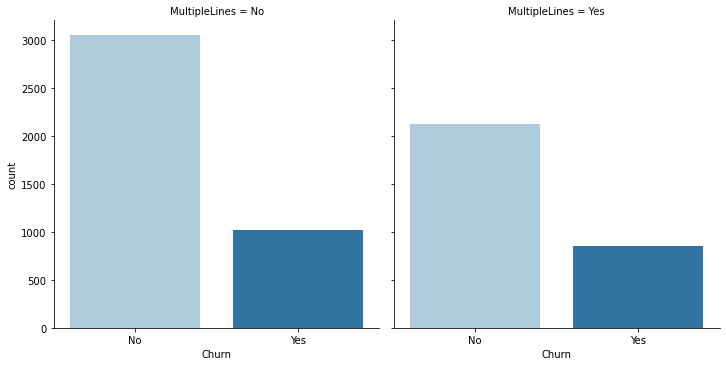

In [56]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='MultipleLines',data=df,kind='count',palette="Paired")

Customers with Multiplelines are less in number.And Customers with Multiplelines are less churned.

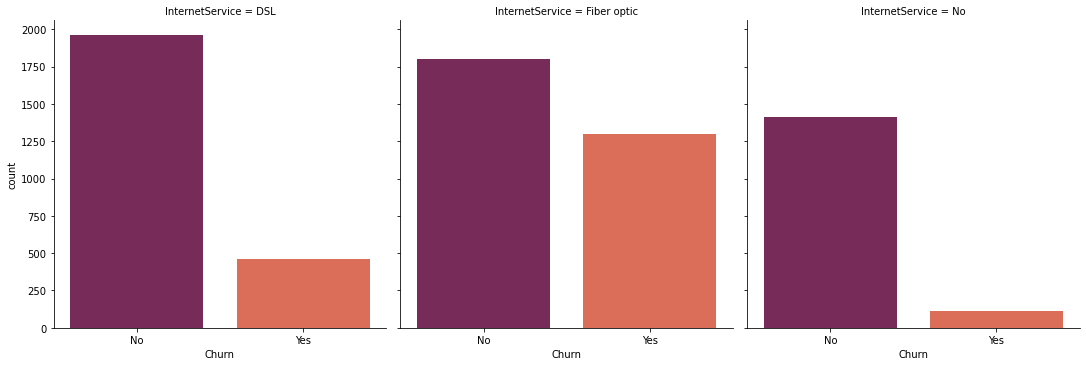

In [57]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='InternetService',data=df,kind='count',palette="rocket")

Customers with Fiber optic InternetService are high in number.And Customers with Fiber optic InternetService are highly churned than any other service users.

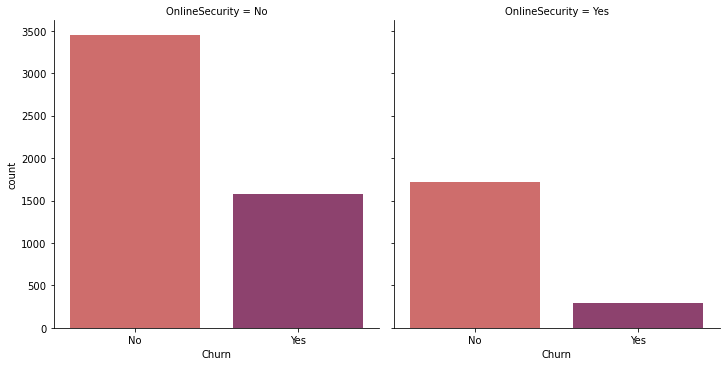

In [58]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='OnlineSecurity',data=df,kind='count',palette="flare")

Customers with onlinesecurity are more in number.But Customers without online service are more churned.

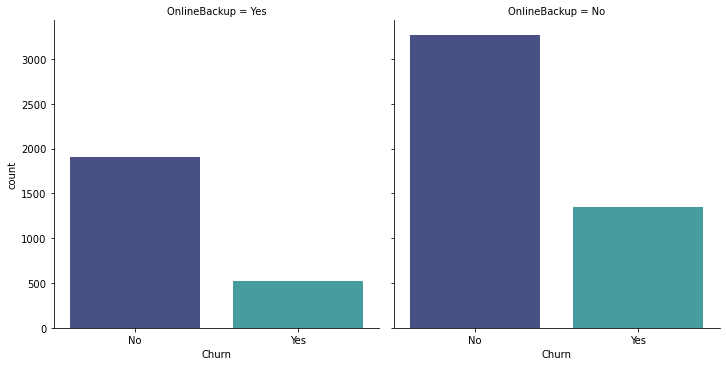

In [59]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='OnlineBackup',data=df,kind='count',palette="mako")

Customers without onlinebackup are more in number.And Customers without onlinebackup are more churned.

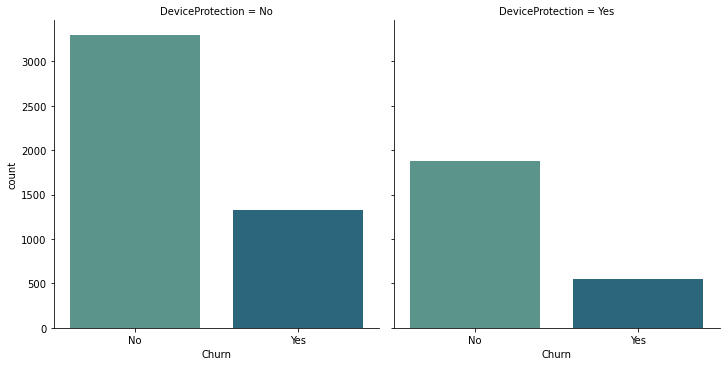

In [60]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='DeviceProtection',data=df,kind='count',palette="crest")

Customers wothout device protection are more in number.And Customers without device protection are more churned.

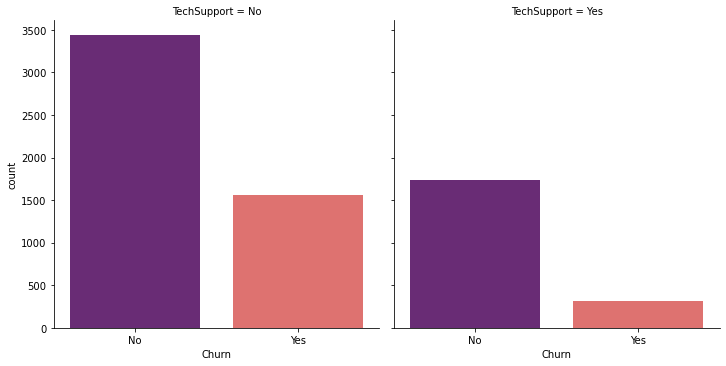

In [61]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='TechSupport',data=df,kind='count',palette="magma")

Customers Without techsupport are more in number.And Customers Without techsupport are more churned.

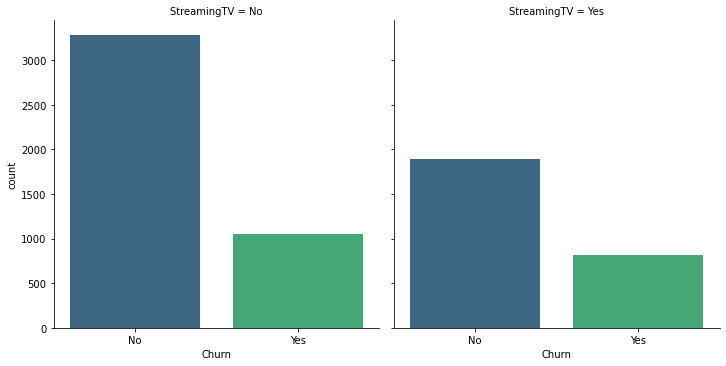

In [62]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='StreamingTV',data=df,kind='count',palette="viridis")

Customers Without StreamingTV are more in number.And Customers Without StreamingTV are more churned.

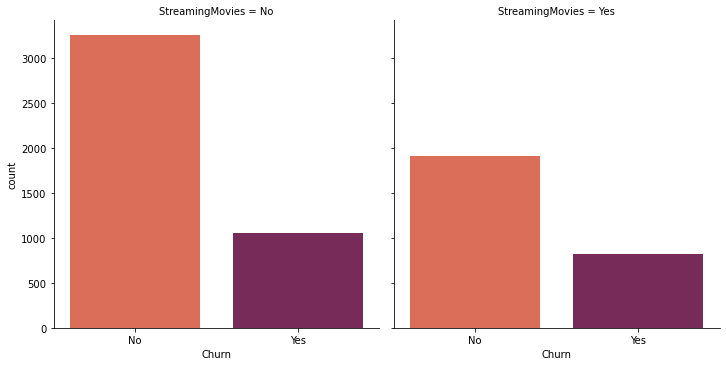

In [63]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='StreamingMovies',data=df,kind='count',palette="rocket_r")

Customers Without StreamingMovies are more in number.And Customers Without StreamingMovies are more churned.

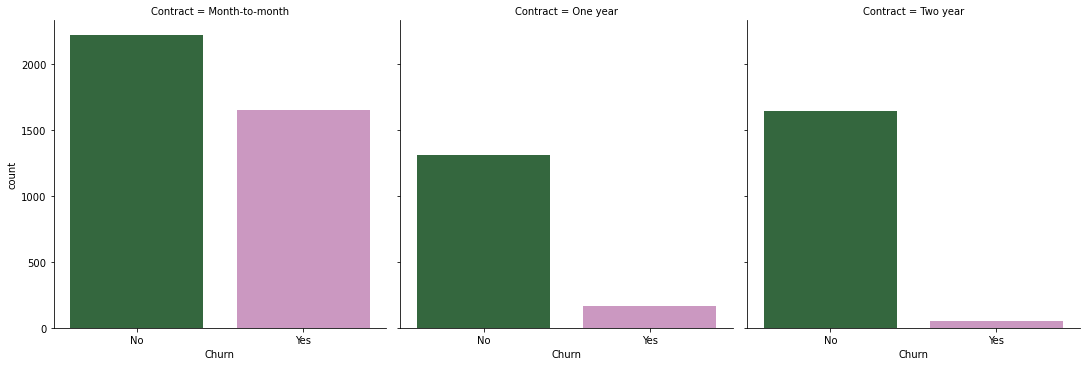

In [64]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='Contract',data=df,kind='count',palette="cubehelix")

Customers With Month-to-month contract are more in number.And Customers With Month-to-month contract are more churned than other contracts.

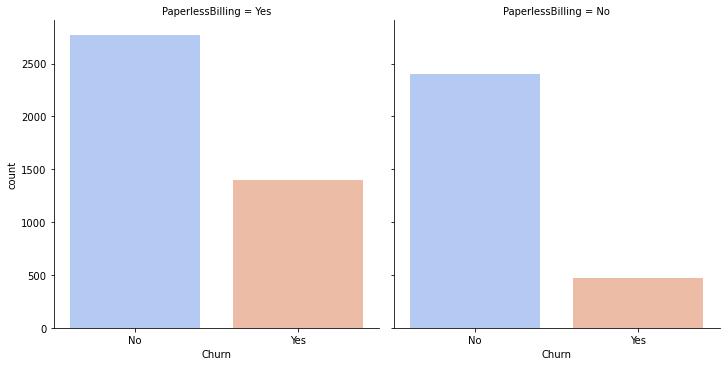

In [65]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='PaperlessBilling',data=df,kind='count',palette="coolwarm")

Customers With Paperlessbill are more in number.And Customers With paperlessbill are more churned.

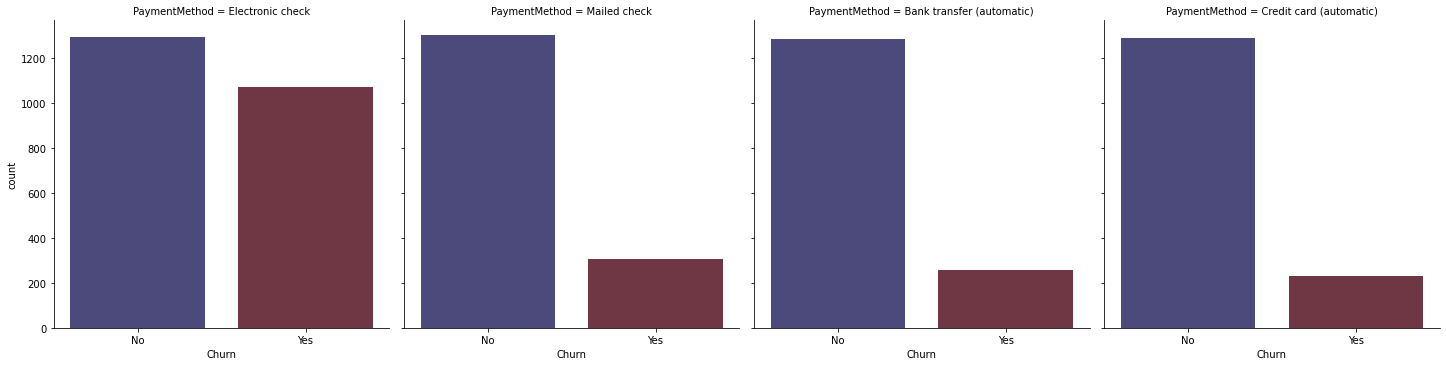

In [66]:
#Comparision between features using cat plot
sns.catplot(x='Churn',col='PaymentMethod',data=df,kind='count',palette="icefire")

Customers With Electronic check payment method are more in number.And Customers With Electronic check payment method are more churned.

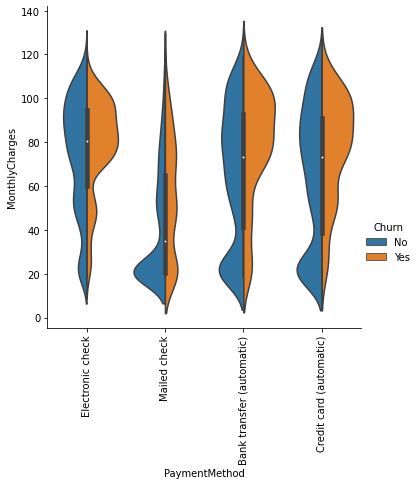

In [67]:
# Let's plot catplot for pair of features
sns.catplot(x = "PaymentMethod", y = "MonthlyCharges", hue = "Churn", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

The churned rate is high for Credit card users and bank transfers.

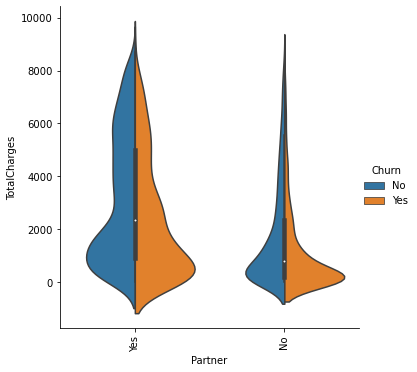

In [68]:
# Let's plot catplot for pair of features
sns.catplot(x = "Partner", y = "TotalCharges", hue = "Churn", kind = "violin", data=df, split=True)
plt.xticks(rotation=90);

The churned rate and total charges is high for customers with partners.

# Multivariate Analysis:

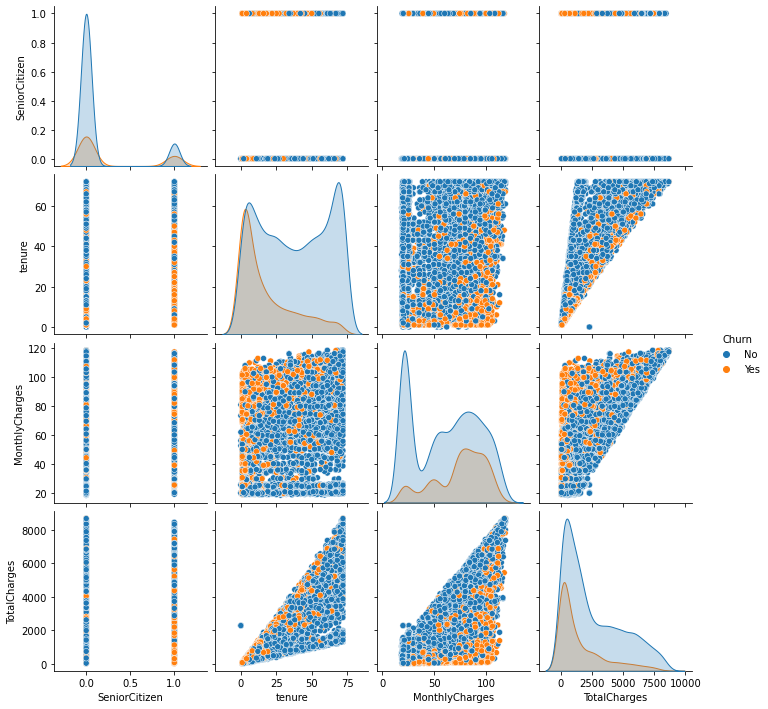

In [69]:
#pair ploting for df
sns.pairplot(df,hue="Churn")

Above is the pair plot for having Churn as target.There are some outliers present in the dataset.

# Data Cleaning:

# Checking for outliers:

<AxesSubplot:>

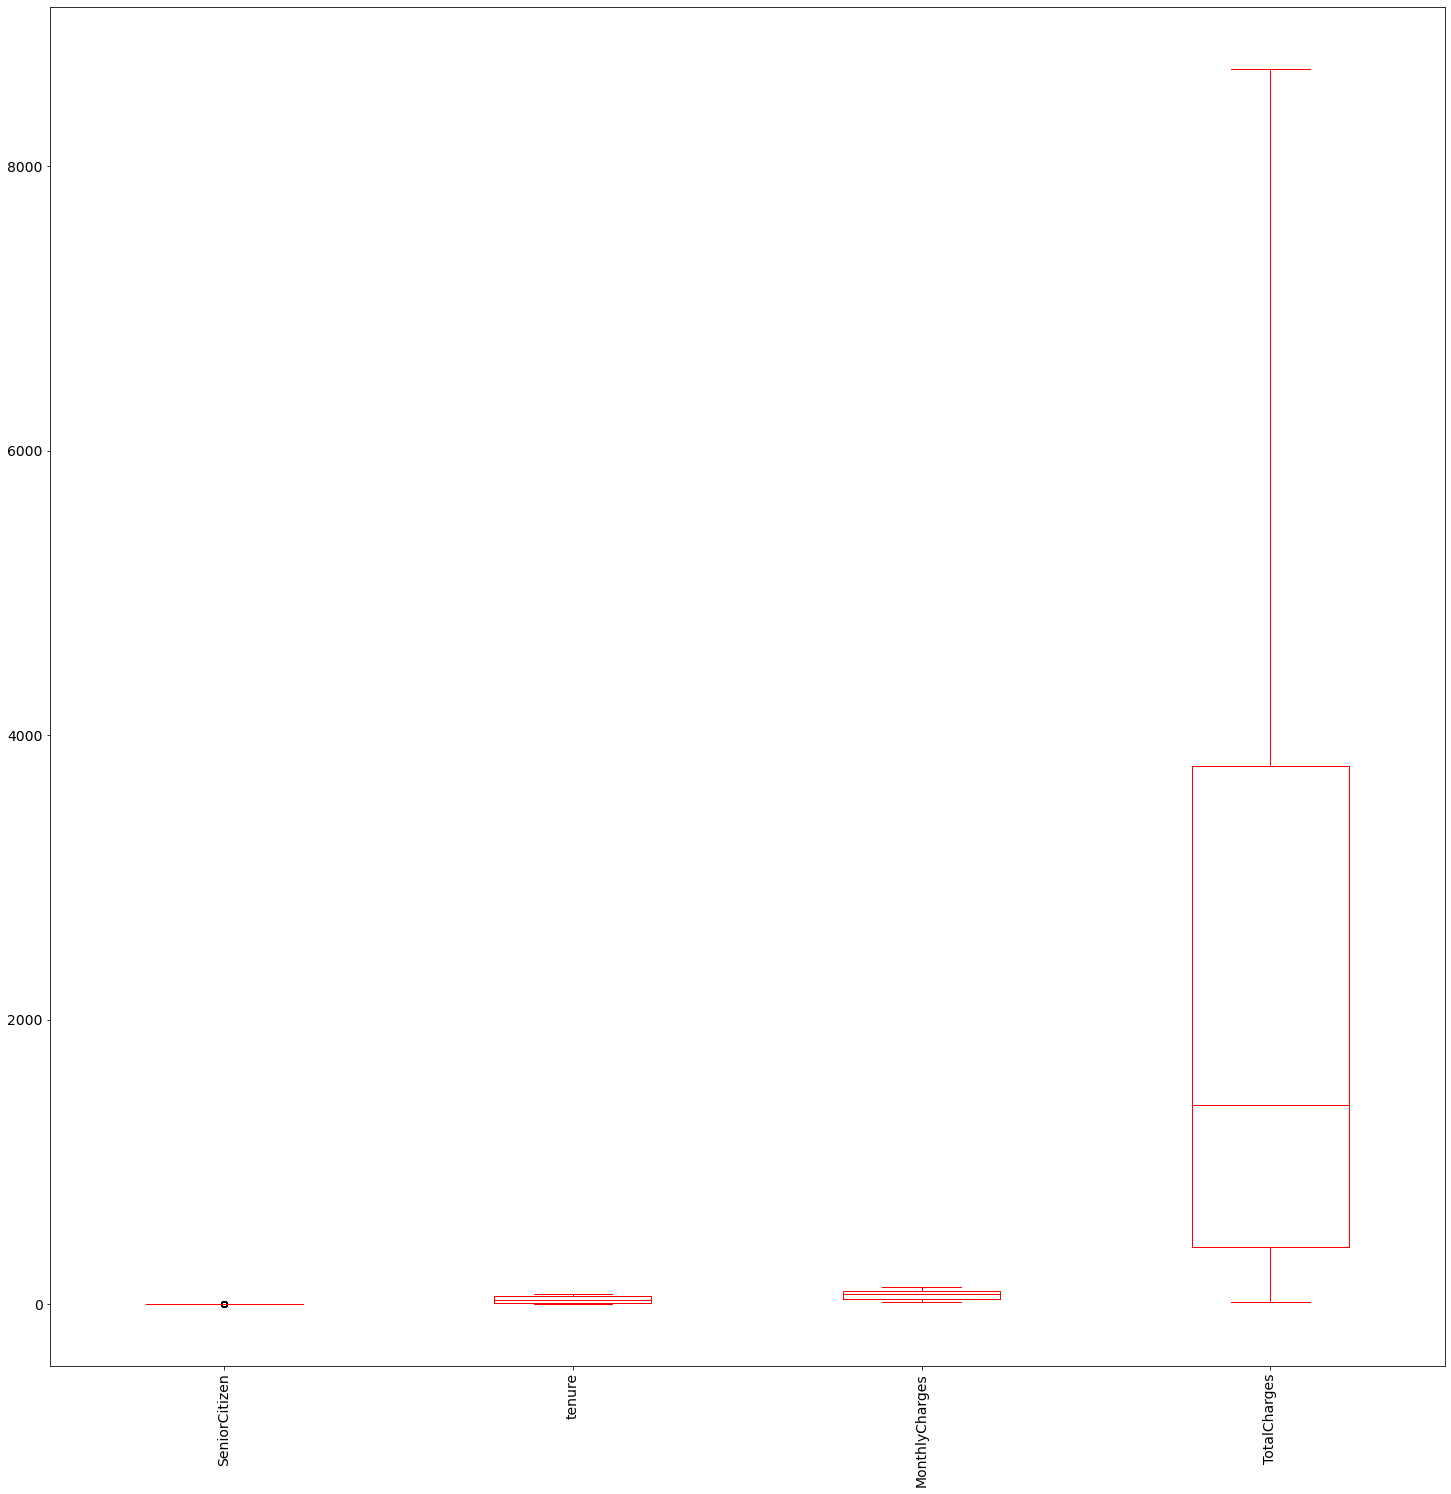

In [70]:
#Checking for outliers using boxplot
df.plot(rot = 90,kind='box',fontsize=14,figsize=(25,25),color='r')

I can find outliers only in SeniorCitizen column and this column is a categorical column with entries 0 and 1.So let me not remove any outliers.

# Checking for skewness:

In [71]:
#Checking for skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

I have skewness in SeniorCitizen and TotalCharges.But SeniorCitizen is a categorical column so let me not remove skewness from this column.And i have to remove skewness from TotalCharges. 

# Removing skewness using yeo-johnson method:

In [72]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

Using yeo_johnson method i am removing the skewness.

In [73]:
df[['TotalCharges']] = scaler.fit_transform(df[['TotalCharges']].values)

Got removed from skewness.

In [74]:
#Checking skewness again
df[['TotalCharges']].skew()

TotalCharges   -0.144899
dtype: float64

Now the skewness has removed.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

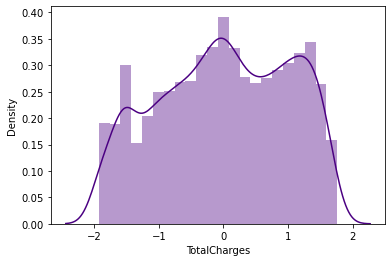

In [75]:
sns.distplot(df['TotalCharges'],color="indigo")

Now skewness has been removed from my columns.

# Ordinal Encoding:

In [76]:
# Separating categorical columns in df
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Above are the list of categorical columns in dataset.

In [77]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


Using Ordinal encoder i have encoded all the categorical columns.

# Checking correlation using heat map:

In [78]:
cor=df.corr()

Checking correlation.

In [79]:
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.000863,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.032310,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.000891,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.044590,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,-0.030359,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,0.387436,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.011124,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.465731,0.040102
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,0.011124,1.000000,-0.393013,-0.314737,-0.306805,-0.389382,-0.242532,-0.250343,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,-0.393013,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.403935,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,-0.314737,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.483612,-0.082255


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot cor using heat map.

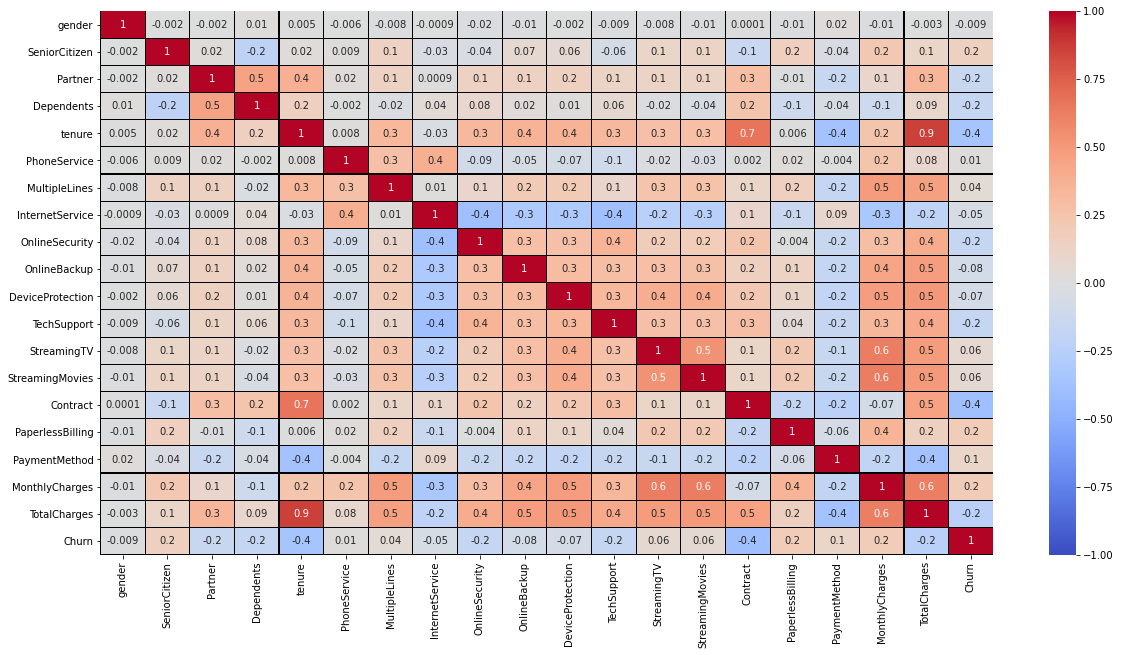

In [80]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

By looking into the heat map i can say that:
- There is a multicolinearity issue between tenure and TotalCharges,Contract and tenure.
- With target gender is very less correlated.
- To get better insight on target correlation with other features let me plot bar plot of target correlation.

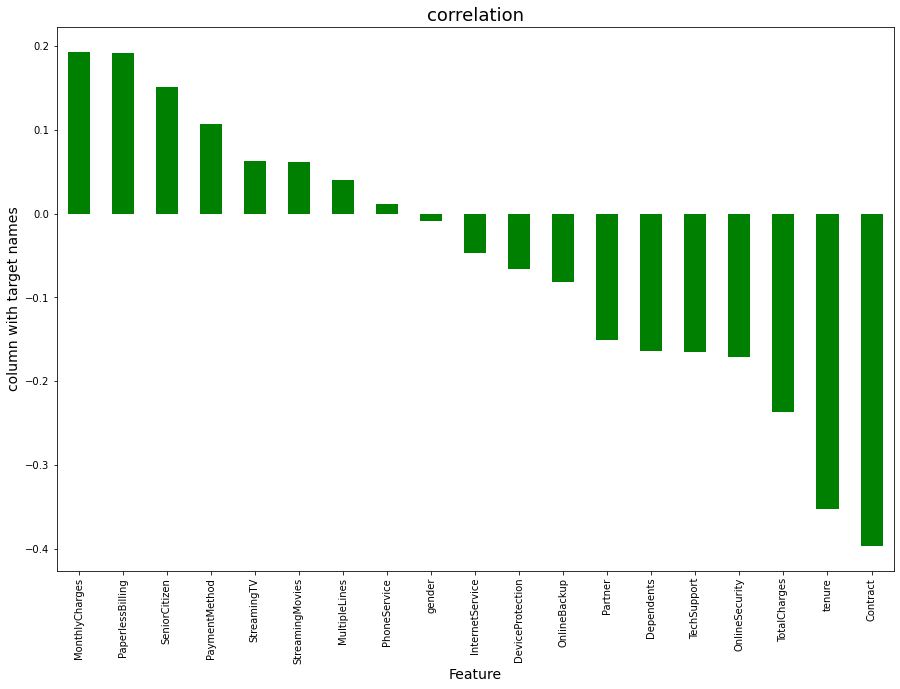

In [81]:
plt.figure(figsize=(15,10))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Gender and PhoneService are very less correlated with target.

# Separating features and label:

In [82]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

I have separated my target and independent columns.

# Scaling the data using standard scaler:

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

I have scaled my data using standard scaler.

In [84]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-1.183234,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,-1.183234,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.79607,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-1.183234,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.79607,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.79607,-0.828207,0.829798,0.398558,0.197365,-1.250118


This is the data of independent variables after scaling.



# Checking multicolinearity using VIF:

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149699,SeniorCitizen
2,1.463080,Partner
3,1.384360,Dependents
4,10.690330,tenure
5,1.712289,PhoneService
6,1.546815,MultipleLines
7,1.909515,InternetService
8,1.471226,OnlineSecurity
9,1.473860,OnlineBackup


In [86]:
#Droping highly VIF columns
X = X.drop(["TotalCharges"],axis=1)

In [87]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.001700,gender
1,1.149607,SeniorCitizen
2,1.460871,Partner
3,1.382066,Dependents
4,2.754518,tenure
5,1.712012,PhoneService
6,1.538487,MultipleLines
7,1.897435,InternetService
8,1.464039,OnlineSecurity
9,1.469031,OnlineBackup


Now the multicolinearity issue is solved.All the VIF values are below 10 it is acceptable.

# Balancing the target variable using oversampling:

In [88]:
#Checking the value count of target column
y.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [89]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X, y = SM.fit_resample(X,y)

In [90]:
# Checking the value counts again
y.value_counts()

1.0    5174
0.0    5174
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

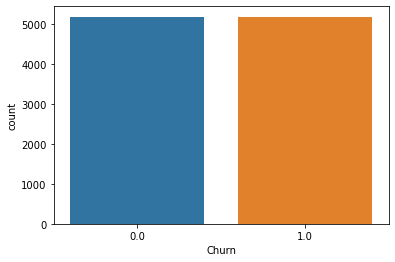

In [91]:
# Visualizing the target data after oversampling
sns.countplot(y)

Now the data looks beautifully balanced.



# Finding Best Random State and Accuracy:

In [92]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [93]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8666666666666667  on Random_state  102


Got the best accuracy and random state.

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train and test data.

# Classification Algorithms:

In [95]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# i) RandomForestClassifier:

In [96]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
predrf=RFC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predrf))
print('Confusion Matrix:',confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

Accuracy Score: 0.8663446054750402
Confusion Matrix: [[1353  217]
 [ 198 1337]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1570
         1.0       0.86      0.87      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



RFC is giving me 87% accuracy.

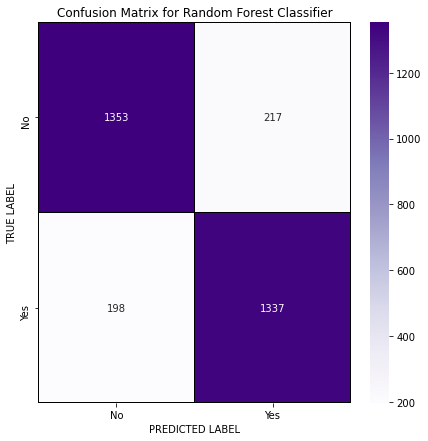

In [97]:
cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

We can see the true values and predicted values in Random Forest Classifier model using confusion matrix.

# ii) XGB Classifier:

In [98]:
XGB=XGBClassifier(verbosity=0)
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predxg))
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

Accuracy Score: 0.8595813204508856
Confusion Matrix: [[1363  207]
 [ 229 1306]]
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1570
         1.0       0.86      0.85      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



XGB is giving me 86% accuracy.

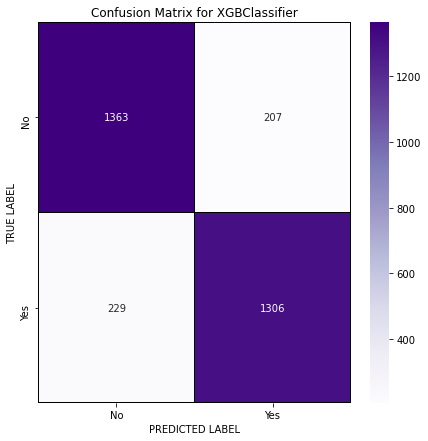

In [99]:
cm = confusion_matrix(y_test, predxg)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBClassifier')
plt.show()

We can see the true values and predicted values in XGB Classifier model using confusion matrix.

# iii) ExtraTreeClassifier:

In [100]:
ETC=ExtraTreesClassifier()
ETC.fit(X_train,y_train)
predet=ETC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predet))
print('Confusion Matrix:',confusion_matrix(y_test, predet))
print(classification_report(y_test,predet))

Accuracy Score: 0.8705314009661835
Confusion Matrix: [[1346  224]
 [ 178 1357]]
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1570
         1.0       0.86      0.88      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



ETC is giving me 87% accuracy.

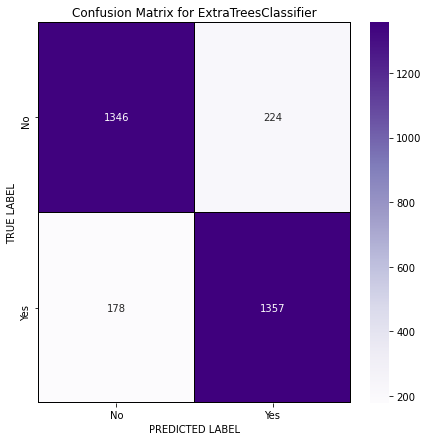

In [101]:
cm = confusion_matrix(y_test, predet)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for ExtraTreesClassifier')
plt.show()

We can see the true values and predicted values in Extra Tree Classifier model using confusion matrix.

# iv) Gradient Boosting Classifier:

In [102]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
predgb=GBC.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8563607085346215
Confusion Matrix: [[1292  278]
 [ 168 1367]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1570
         1.0       0.83      0.89      0.86      1535

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



GBC is giving me 86% accuracy.

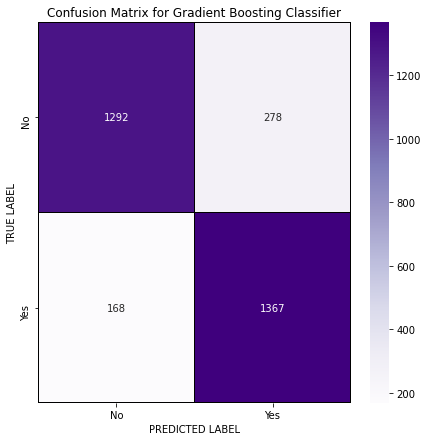

In [103]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

We can see the true values and predicted values in Gradient Boosting Classifier model using confusion matrix.

# v) SupportVectorClassifier:

In [104]:
SV=SVC()
SV.fit(X_train,y_train)
predsv=SV.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test, predsv))
print('Confusion Matrix:',confusion_matrix(y_test, predsv))
print(classification_report(y_test,predsv))

Accuracy Score: 0.814170692431562
Confusion Matrix: [[1185  385]
 [ 192 1343]]
              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80      1570
         1.0       0.78      0.87      0.82      1535

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



SVC is giving me 81% accuracy.

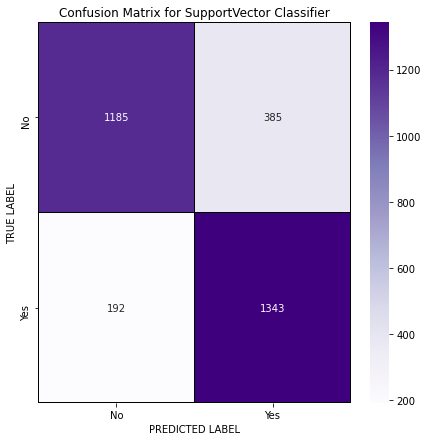

In [105]:
cm = confusion_matrix(y_test, predsv)

x_axis_labels = ["No","Yes"]
y_axis_labels = ["No","Yes"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SupportVector Classifier')
plt.show()

We can see the true values and predicted values in Support Vector Classifier Classifier model using confusion matrix.

# Cross validation scores:

In [106]:
#Importing library
from sklearn.model_selection import cross_val_score

In [107]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,X,y,cv=5).mean())

0.8551512434535109


In [108]:
# cv score for XGB Classifier
print(cross_val_score(XGB,X,y,cv=5).mean())

0.8383409100991634


In [109]:
# cv score for Extra Trees Classifier
print(cross_val_score(ETC,X,y,cv=5).mean())

0.8662619809798662


In [110]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GBC,X,y,cv=5).mean())

0.8334075366054687


In [111]:
# cv score for Support Vector Classifier
print(cross_val_score(SV,X,y,cv=5).mean())

0.801125283982787


Above are the cross validation scores of RFC, XGB, ETC, GBC and SV.

Difference between the model accuracy and cross validation score are:
- RFC - 1.11%
- XGB - 2.13%
- ETC - 0.42%
- GBC - 2.30%
- SV - 1.31%

So by looking into the difference of model accuracy and cross validation score i found ExtraTreesClassifier as best model.

# ROC-AUC curve:

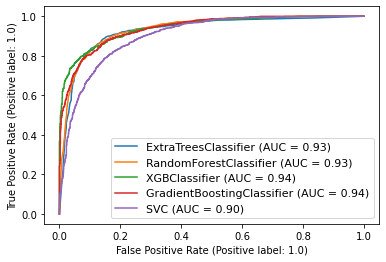

In [112]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(ETC,X_test,y_test)
plot_roc_curve(RFC, X_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(SV, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

- AUC value is high for XGBClassifier and GradientBoostingClassifier than ExtraTreesClassifier.

# Hyper Parameter tuning:

In [113]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [114]:
parameter = {'criterion':['gini','entropy'],
             'random_state': [10,100,1000],
             'n_jobs':[-2,-1,1,2],
             'n_estimators':[100,200,300,400],
             'max_depth': [0,10,20,30]}

Giving the parameters list for ETC model.

In [115]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)

Running grid search CV for ETC.

In [116]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30],
                         'n_estimators': [100, 200, 300, 400],
                         'n_jobs': [-2, -1, 1, 2],
                         'random_state': [10, 100, 1000]})

Training the model with GCV.

In [117]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

Got the best parameters for ETC.

In [118]:
Churn_mod=ExtraTreesClassifier(criterion='gini', max_depth=20,n_estimators=200, n_jobs=-2, random_state=10)
Churn_mod.fit(X_train,y_train)
pred=Churn_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 87.31078904991948
Confusion matrix: [[1316  254]
 [ 140 1395]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87      1570
         1.0       0.85      0.91      0.88      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.88      0.87      0.87      3105



Before the model accuracy was 87.05% after tunning it has increased to 87.31% it looks good!!!!!

# AUC ROC CURVE for final model:

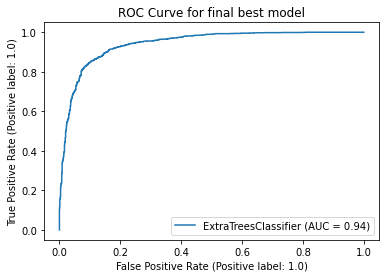

In [119]:
#Ploting ROC curve for final best model
plot_roc_curve(Churn_mod, X_test, y_test)
plt.title('ROC Curve for final best model')
plt.show()

Great after hyperparameter tuning we got improvement in roc curve and AUC also.

# Saving the model:

In [120]:
#Saving the model as .pkl file
import joblib
joblib.dump(Churn_mod,"CustomerChurn.pkl")

['CustomerChurn.pkl']

I have saved the final best model as CustomerChurn.Using .pkl.

# Predictions:

In [121]:
# Loading the saved model
model=joblib.load("CustomerChurn.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([1., 0., 0., ..., 1., 1., 0.])

In [122]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

Above are the predicted values and the actual values.They are almost similar.

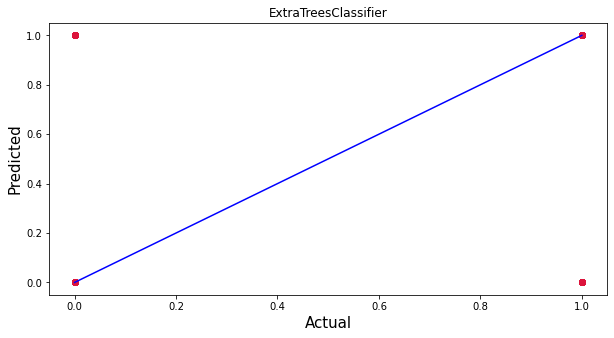

In [123]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("ExtraTreesClassifier")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

# Done:

# Thank You:) For Evaluating My Project:)

# Stay Safe:)